In [1]:
import pandas as pd
import numpy as np
import welly
import lasio

  

from scipy import integrate
from scipy import signal
from ipywidgets import interact

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%pwd

'/Users/flo/PythonScripts'

In [3]:
from welly import Well

w = Well.from_las('./data/well.las')


Header section Parameter regexp=~P was not found.


In [13]:
type(w)

welly.well.Well

In [10]:
type(welly.well)

module

In [11]:
type(welly.well.Well)

type

In [4]:
w.data

{'GR': Curve([30.4704, 30.8189, 30.1844, ..., 70.3552, 70.3552,     nan]),
 'V_CLAY_ALL': Curve([0.2613, 0.2672, 0.2564, ..., 0.9349, 0.9349,    nan])}

In [12]:
type(w.data)

dict

In [18]:
type(w.df())

pandas.core.frame.DataFrame

In [19]:
w.df().head() # df() method converts welly.well.Well into dataframe

,GR,V_CLAY_ALL
DEPT,,
902.1352,30.4704,0.2613
902.2876,30.8189,0.2672
902.4400,30.1844,0.2564
902.5924,30.2714,0.2579
902.7448,30.7941,0.2667


In [11]:
w.df().index

Float64Index([ 902.1352,  902.2876,    902.44,  902.5924,  902.7448,  902.8972,
               903.0496,   903.202,  903.3544,  903.5068,
              ...
              2927.3788, 2927.5312, 2927.6836,  2927.836, 2927.9884, 2928.1408,
              2928.2932, 2928.4456,  2928.598, 2928.7504],
             dtype='float64', name='DEPT', length=13299)

In [15]:

w.df().describe()

,GR,V_CLAY_ALL
count,13298.000000,13298.000000
mean,55.460314,0.681391
std,12.633178,0.209657
min,18.509500,0.059300
25%,46.491725,0.531825
50%,59.124550,0.745200
75%,64.341375,0.833300
max,95.891600,1.000000


In [6]:
gr = w.data['GR'] 

In [8]:
gri=w.df().index
#gri=wf.df.index.values

In [37]:
type(gr)

numpy.ndarray

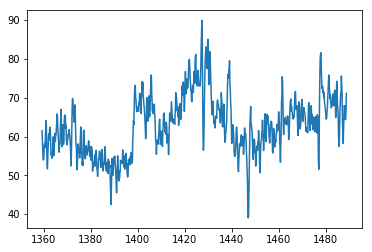

In [55]:
top=3000
interval = 850
base=top+interval
gr_interval=gr[top:base]
gri_interval=gri[top:base]
plt.plot(gri_interval,gr_interval)
#plt.plot(gri)
plt.show()

In [11]:
@interact(top=(0,8000,100), interval =(10, 10000, 10))
def testfunc(top, interval):
    gr_interval=gr[top:top+interval]
    gri_interval=gri[top:top+interval]
    plt.plot(gri_interval,gr_interval)
    plt.show()
    return (top,interval)

interactive(children=(IntSlider(value=4000, description='top', max=8000, step=100), IntSlider(value=5000, desc…

poly1d([  5427.25085116, -10944.05807237,  57517.2767454 ,   -100.98701402])

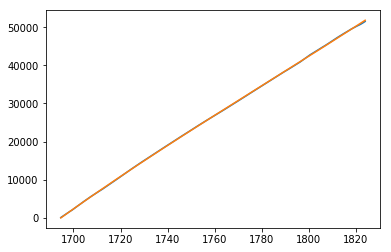

In [12]:
gr_interval_int=integrate.cumtrapz(gr_interval)
gr_interval_int=np.append([0],gr_interval_int)
x=np.linspace(0, 1, len(gri_interval))
p = np.poly1d(np.polyfit(x, gr_interval_int, 3))
y=p(x)
#plt.plot(gri_interval,gr_interval_int)
plt.plot(gri_interval,gr_interval_int)
plt.plot(gri_interval,y)
p

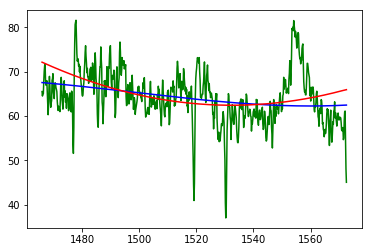

In [78]:
gr_interval_int=integrate.cumtrapz(gr_interval)
gr_interval_int=np.append([0],gr_interval_int)
x=np.linspace(0, 1, len(gri_interval))
dx=1/len(gri_interval)
p2 = np.poly1d(np.polyfit(x, gr_interval, 3))
y=p2(x)
p3 = np.polyder(p,1)
y_3 = p(x)
y_4 = np.diff(y_3)
y_4=np.append(y_4,y_4[-1])
#plt.plot(gri_interval,gr_interval_int)
plt.plot(gri_interval,gr_interval,'g')
plt.plot(gri_interval,y,'b')


plt.plot(gri_interval,y_4,'r')



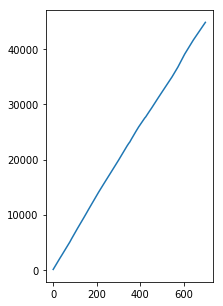

In [104]:
gr_interval_int=integrate.cumtrapz(gr_interval)
plt.figure(figsize=(3,5))
plt.plot(gr_interval_int)

In [17]:
gr_interval_int

23327.96

In [13]:
widths = np.arange(1, 31)
cwtmatr = signal.cwt(gr_interval, signal.ricker, widths)


/Applications/anaconda3/envs/geocomp/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


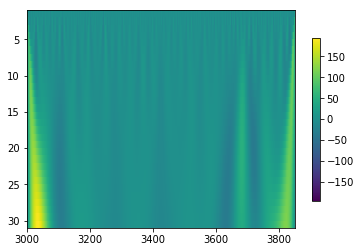

In [59]:
plt.imshow(cwtmatr, extent=[top, base, 31, 1], cmap='viridis', aspect='auto',
...            vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.colorbar(shrink=0.75)
plt.show()


[ 79 126 160 171 207 237 260 306 340 357 405 442 467 476 485 503 535 560
 609 661 699 739]


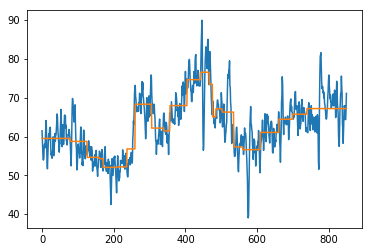

In [56]:
scale=15
zero_crossings = np.where(np.diff(np.signbit(cwtmatr[scale,:])))[0]
zero_crossings = np.delete(zero_crossings,0)
print(zero_crossings)

upper = 0 

lst = len(gr_interval)
gr_blk=np.copy(gr_interval)
for i in zero_crossings:
    #print(i)
    avg = np.average(gr_interval[upper:i])
    gr_blk[upper:i]=avg
    upper = i
    #print(avg)
avg = np.average(gr_interval[upper:lst])
gr_blk[upper:lst]=avg
plt.plot(gr_interval)
plt.plot(gr_blk)



In [83]:
@interact(scale=(0,29,1))
def h(scale=15):
    
    zero_crossings = np.where(np.diff(np.signbit(cwtmatr[scale,:])))[0]
    zero_crossings = np.delete(zero_crossings,0)
    print(zero_crossings)

    upper = 0 

    lst = len(gr_interval)
    gr_blk=np.copy(gr_interval)
    for i in zero_crossings:
        #print(i)
        avg = np.average(gr_interval[upper:i])
        gr_blk[upper:i]=avg
        upper = i
        #print(avg)
    avg = np.average(gr_interval[upper:lst])
    gr_blk[upper:lst]=avg
    plt.plot(gr_interval)
    plt.plot(gr_blk)

    return scale

interactive(children=(IntSlider(value=15, description='scale', max=29), Output()), _dom_classes=('widget-inter…

In [126]:
@interact(scale=(0,29,1))
def h(scale=15):
    
    zero_crossings = np.where(np.diff(np.signbit(cwtmatr[scale,:])))[0]
    zero_crossings = np.delete(zero_crossings,0)
    print(zero_crossings)

    upper = 0 

    lst = len(gr_interval)
    gr_blk=np.copy(gr_interval)
    for i in zero_crossings:
        #print(i)
        avg = np.average(gr_interval[upper:i])
        gr_blk[upper:i]=avg
        upper = i
        #print(avg)
    avg = np.average(gr_interval[upper:lst])
    gr_blk[upper:lst]=avg
    plt.plot(gr_interval)
    plt.plot(gr_blk)

    return scale

interactive(children=(IntSlider(value=15, description='scale', max=29), Output()), _dom_classes=('widget-inter…

In [134]:
    widths = np.arange(1, 31)
    cwtmatr = signal.cwt(gr_interval, signal.ricker, widths)

/Applications/anaconda3/envs/geocomp/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [132]:
@interact(scale=(0,29,1))
def h(scale=15):
    
    zero_crossings = np.where(np.diff(np.signbit(cwtmatr[scale,:])))[0]
    zero_crossings = np.delete(zero_crossings,0)
    print(zero_crossings)

    upper = 0 

    lst = len(gr_interval)
    zero_crossings = np.append(zero_crossings,lst)
    gr_blk=np.copy(gr_interval)
    for i in zero_crossings:
        avg = np.average(gr_interval[upper:i])
        gr_blk[upper:i]=avg
        upper = i
        #print(avg)
    #avg = np.average(gr_interval[upper:lst])
    #gr_blk[upper:lst]=avg
    plt.plot(gr_interval)
    plt.plot(gr_blk)

    return scale

interactive(children=(IntSlider(value=15, description='scale', max=29), Output()), _dom_classes=('widget-inter…

In [137]:
    widths = np.arange(1, 31)
    cwtmatr = signal.cwt(gr_interval, signal.ricker, widths)

/Applications/anaconda3/envs/geocomp/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)


In [16]:
@interact(scale=(0,29,1))
def h(scale=17):
    
    zero_crossings = np.where(np.diff(np.signbit(cwtmatr[scale,:])))[0]
    zero_crossings = np.delete(zero_crossings,0)
    print(zero_crossings)

    upper = 0 

    lst = len(gr_interval)
    zero_crossings = np.append(zero_crossings,lst)
    
    gr_blk=np.copy(gr_interval)
    for i in zero_crossings:

        gr_interval_int=integrate.cumtrapz(gr_interval[upper:i]) # integrate the log
        gr_interval_int=np.append([0],gr_interval_int) # add zero at beginning to keep length the same
        
        x=np.linspace(0, 1, len(gri_interval[upper:i])) # make x-axis scale independent (still need to do for y-axis)
        p = np.poly1d(np.polyfit(x, gr_interval_int, 3)) # fit polynome: last argument is order 2=linear

        y_3 = p(x) # calculate fitted function
        y_4 = np.diff(y_3) # differentiate back 
        y_4=np.append(y_4,y_4[-1]) # add values at end to make sure length stays the same

        gr_blk[upper:i]=y_4 # copy to output array
        
        upper = i # make new upper boundary of interval
        
    # Just for plotting...

    top_max = np.max(np.array(gri_interval))  
    base_min=np.min(np.array(gri_interval))
    
    plt.figure(figsize=(3,10))
    plt.plot(gr_interval,gri_interval)
    plt.plot(gr_blk,gri_interval,'r.')
    plt.ylim(top_max,base_min)  # 
    #plt.savefig('figure2_8.png')
   

    return scale

interactive(children=(IntSlider(value=17, description='scale', max=29), Output()), _dom_classes=('widget-inter…

In [45]:
def fitpoly(y,order=2):
    """ Function to fit on integrated numpy array and return fitted function"""
    y = integrate.cumtrapz(y) # integrate the log
    y = np.append([0],y) # add zero at beginning to keep length the same
    x=np.linspace(0, 1, len(y)) # make x-axis scale independent (still need to do for y-axis)
    coef = np.polyfit(x, y, order)
    p = np.poly1d(coef) # fit polynome: last argument is order 2=linear
    z = p(x) # calculate fitted function
    z = np.diff(z) # differentiate back 
    z=np.append(z,z[-1]) # add values at end to make sure length stays the same
    
    return z, coef


In [43]:
def blocker(y, scale, wid=31):
    """create array of zerocrossings from input array using wavelet transform"""
    
    widths = np.arange(1, wid)
    cwtmatr = signal.cwt(y, signal.ricker, widths)
    zero_crossings = np.where(np.diff(np.signbit(cwtmatr[scale,:])))[0]
    zero_crossings = np.delete(zero_crossings,0)
    lst = len(y)
    zero_crossings = np.append(zero_crossings,lst)
    
    return zero_crossings

In [81]:
@interact(scale=(0,29,1))
def h(scale=8):
    
    upper = 0
    zeroes = blocker(gr_interval, scale, )    
    #gr_blk=np.copy(gr_interval)
    
    for i in zeroes:
        
        gr_blk[upper:i], coeff = fitpoly(gr_interval[upper:i],3) # unpack fitted array and parameters
        upper = i # make new upper boundary of interval
        
    # Just for plotting...

    top_max = np.max(np.array(gri_interval))  
    base_min=np.min(np.array(gri_interval))
    
    plt.figure(figsize=(3,10))
    plt.plot(gr_interval,gri_interval)
    plt.plot(gr_blk,gri_interval,'r.')
    plt.ylim(top_max,base_min)  # 
    #plt.savefig('figure2_8.png')
    print(coeff)
    print(zeroes)

    return scale

interactive(children=(IntSlider(value=8, description='scale', max=29), Output()), _dom_classes=('widget-intera…

In [102]:
@interact(scale=(1,29,1),scale2=(0,28,1))
def h(scale=29,scale2=11):
    
 
    zeroes = blocker(gr_interval, scale, )    
    gr_blk=np.copy(gr_interval)
    gr_res=np.copy(gr_interval)
    gr_blk2=np.copy(gr_interval)
    gr_blk_sum=np.copy(gr_interval)
    
    upper = 0
    
    for i in zeroes:
        
        gr_blk[upper:i], coeff = fitpoly(gr_interval[upper:i],2) # unpack fitted array and parameters       
        upper = i # make new upper boundary of interval
        
    upper = 0

    gr_res = gr_interval - gr_blk
    zeroes2 = blocker(gr_res, scale2, ) 
    
    for i in zeroes2:
        
        gr_blk2[upper:i], coeff2 = fitpoly(gr_res[upper:i],2) 
        upper = i # make new upper boundary of interval
    
    gr_blk_sum = gr_blk + gr_blk2   
    # Just for plotting...

    top_max = np.max(np.array(gri_interval))  
    base_min=np.min(np.array(gri_interval))
    
    plt.figure(figsize=(3,10))
    plt.plot(gr_interval,gri_interval)
    plt.plot(gr_blk,gri_interval,'b.')
    plt.plot(gr_blk_sum,gri_interval,'r.')
    plt.ylim(top_max,base_min)  # 
    #plt.savefig('figure2_8.png')
    print(coeff)
    print(coeff2)
    print(zeroes)

    return scale

interactive(children=(IntSlider(value=29, description='scale', max=29, min=1), IntSlider(value=11, description…

In [101]:
np.max(np.array(gri_interval))

1572.5428